<a href="https://colab.research.google.com/github/sbien1208/projet_python/blob/main/Projet_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv("/content/diabetic_data.csv", sep =",")
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33238,105265992,104815368,AfricanAmerican,Male,[40-50),?,1,1,7,5.0,...,No,Steady,Steady,No,No,No,No,Ch,Yes,>30
33239,105266388,107942895,Caucasian,Female,[50-60),?,1,6,7,5.0,...,No,No,No,No,No,No,No,No,No,NO
33240,105267612,25969050,Caucasian,Female,[80-90),?,1,6,17,5.0,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
33241,105269910,5331294,AfricanAmerican,Male,[70-80),?,1,1,7,4.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
data.columns = data.columns.str.strip()
print(data['weight'])

0        ?
1        ?
2        ?
3        ?
4        ?
        ..
33238    ?
33239    ?
33240    ?
33241    ?
33242    ?
Name: weight, Length: 33243, dtype: object


In [ ]:
data = data.drop('weight', axis=1)

In [ ]:
data.columns = data.columns.str.strip()
print(data['payer_code'])

0          ?
1          ?
2          ?
3          ?
4          ?
        ... 
33238      ?
33239      ?
33240     MC
33241      ?
33242    NaN
Name: payer_code, Length: 33243, dtype: object


We need to replace the admission_type_id by its description.

In [ ]:
correspondance = {
    1: 'Emergency',
    2: 'Urgent',
    3: 'Elective',
    4: 'Newborn',
    5: 'Not Available',
    6: 'NULL',
    7: 'Trauma Center',
    8: 'Not Mapped'
}

data['admission_type_id'] = data['admission_type_id'].replace(correspondance)

We do the same with the column 'discharge_disposition_id'

In [ ]:
correspondance = {
    1: 'Discharged to home',
    2: 'Discharged/transferred to another short term hospital',
    3: 'Discharged/transferred to SNF',
    4: 'Discharged/transferred to ICF',
    5: 'Discharged/transferred to another type of inpatient care institution',
    6: 'Discharged/transferred to home with home health service',
    7: 'Left AMA',
    8: 'Discharged/transferred to home under care of Home IV provider',
    9: 'Admitted as an inpatient to this hospital',
    10: 'Neonate discharged to another hospital for neonatal aftercare',
    11: 'Expired',
    12: 'Still patient or expected to return for outpatient services',
    13: 'Hospice / home',
    14: 'Hospice / medical facility',
    15: 'Discharged/transferred within this institution to Medicare approved swing bed',
    16: 'Discharged/transferred/referred another institution for outpatient services',
    17: 'Discharged/transferred/referred to this institution for outpatient services',
    18: 'NULL',
    19: '"Expired at home. Medicaid only, hospice"',
    20: '"Expired in a medical facility. Medicaid only, hospice"',
    21: '"Expired, place unknown. Medicaid only, hospice"',
    22: 'Discharged/transferred to another rehab fac including rehab units of a hospital',
    23: 'Discharged/transferred to a long term care hospital',
    24: 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare',
    25: 'Not Mapped',
    26: 'Unknown/Invalid',
    27: 'Discharged/transferred to a federal health care facility',
    28: 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
    29: 'Discharged/transferred to a Critical Access Hospital (CAH)',
    30: 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere'

}

data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(correspondance)

In [ ]:
correspondance = {
    1: 'Physician Referral',
    2: 'Clinic Referral',
    3: 'HMO Referral',
    4: 'Transfer from a hospital',
    5: 'Transfer from a Skilled Nursing Facility (SNF)',
    6: 'Transfer from another health care facility',
    7: 'Emergency Room',
    8: 'Court/Law Enforcement',
    9: 'Not Available',
    10: 'Transfer from critial access hospital',
    11: 'Normal Delivery',
    12: 'Premature Delivery',
    13: 'Sick Baby',
    14: 'Extramural Birth',
    15: 'Not Available',
    17: 'NULL',
    18: 'Transfer From Another Home Health Agency',
    19: 'Readmission to Same Home Health Agency',
    20: 'Not Mapped',
    21: 'Unknown/Invalid',
    22: 'Transfer from hospital inpt/same fac reslt in a sep claim',
    23: 'Born inside this hospital',
    24: 'Born outside this hospital',
    25: 'Transfer from Ambulatory Surgery Center',
    26: 'Transfer from Hospice'
}

data['admission_source_id'] = data['admission_source_id'].replace(correspondance)

In [ ]:
correspondance = {
    '?': 'MissingValue'
}

data['payer_code'] = data['payer_code'].replace(correspondance)
data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NULL,Not Mapped,Physician Referral,1.0,MissingValue,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3.0,MissingValue,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2.0,MissingValue,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2.0,MissingValue,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1.0,MissingValue,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33238,105265992,104815368,AfricanAmerican,Male,[40-50),Emergency,Discharged to home,Emergency Room,5.0,MissingValue,...,No,Steady,Steady,No,No,No,No,Ch,Yes,>30
33239,105266388,107942895,Caucasian,Female,[50-60),Emergency,Discharged/transferred to home with home healt...,Emergency Room,5.0,MissingValue,...,No,No,No,No,No,No,No,No,No,NO
33240,105267612,25969050,Caucasian,Female,[80-90),Emergency,Discharged/transferred to home with home healt...,NULL,5.0,MC,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
33241,105269910,5331294,AfricanAmerican,Male,[70-80),Emergency,Discharged to home,Emergency Room,4.0,MissingValue,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
data['time_in_hospital'].value_counts(dropna=False)

3.0     5471
2.0     5335
4.0     4545
1.0     4243
5.0     3281
6.0     2575
7.0     1982
8.0     1600
9.0     1094
10.0     918
11.0     704
12.0     581
13.0     478
14.0     435
NaN        1
Name: time_in_hospital, dtype: int64

In [ ]:
data = data.dropna(subset=['time_in_hospital'])

In [ ]:
data['citoglipton'].value_counts()

No    33242
Name: citoglipton, dtype: int64

In [ ]:
data = data.drop('citoglipton', axis=1)

In [ ]:
data['glyburide-metformin'].value_counts()

No        33196
Steady       38
Down          4
Up            4
Name: glyburide-metformin, dtype: int64

In [ ]:
data = data.drop('glyburide-metformin', axis=1)

In [ ]:
data['glipizide-metformin'].value_counts()

No    33242
Name: glipizide-metformin, dtype: int64

In [ ]:
data = data.drop('glipizide-metformin', axis=1)

In [ ]:
data['glimepiride-pioglitazone'].value_counts()

No    33242
Name: glimepiride-pioglitazone, dtype: int64

In [ ]:
data = data.drop('glimepiride-pioglitazone', axis=1)

In [ ]:
data['metformin-rosiglitazone'].value_counts()

No    33242
Name: metformin-rosiglitazone, dtype: int64

In [ ]:
data = data.drop('metformin-rosiglitazone', axis=1)

In [ ]:
data['metformin-pioglitazone'].value_counts()

No    33242
Name: metformin-pioglitazone, dtype: int64

In [ ]:
data = data.drop('metformin-pioglitazone', axis=1)

In [ ]:
data['payer_code'].value_counts()

MissingValue    28068
MC               2799
HM                808
UN                593
BC                316
MD                268
CP                193
SP                 64
CM                 45
DM                 34
PO                 24
SI                 13
WC                  9
CH                  5
OT                  3
Name: payer_code, dtype: int64

In [ ]:
data['troglitazone'].value_counts()

No        33239
Steady        3
Name: troglitazone, dtype: int64

In [ ]:
data = data.drop('troglitazone', axis=1)

In [ ]:
data['examide'].value_counts()

No    33242
Name: examide, dtype: int64

In [ ]:
data = data.drop('examide', axis=1)

In [ ]:
data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NULL,Not Mapped,Physician Referral,1.0,MissingValue,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3.0,MissingValue,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2.0,MissingValue,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2.0,MissingValue,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1.0,MissingValue,...,No,No,No,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33237,105265782,15580827,?,Female,[50-60),Urgent,Discharged/transferred to ICF,Transfer from another health care facility,2.0,MD,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
33238,105265992,104815368,AfricanAmerican,Male,[40-50),Emergency,Discharged to home,Emergency Room,5.0,MissingValue,...,No,No,No,No,No,No,Steady,Ch,Yes,>30
33239,105266388,107942895,Caucasian,Female,[50-60),Emergency,Discharged/transferred to home with home healt...,Emergency Room,5.0,MissingValue,...,No,No,No,No,No,No,No,No,No,NO
33240,105267612,25969050,Caucasian,Female,[80-90),Emergency,Discharged/transferred to home with home healt...,NULL,5.0,MC,...,No,No,No,No,No,No,Steady,Ch,Yes,>30


In [ ]:
data['tolbutamide'].value_counts()

No        33227
Steady       15
Name: tolbutamide, dtype: int64

In [ ]:
data = data.drop('tolbutamide', axis=1)

In [ ]:
data['acetohexamide'].value_counts()

No        33241
Steady        1
Name: acetohexamide, dtype: int64

In [ ]:
data = data.drop('acetohexamide', axis=1)

In [ ]:
data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NULL,Not Mapped,Physician Referral,1.0,MissingValue,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3.0,MissingValue,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2.0,MissingValue,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2.0,MissingValue,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1.0,MissingValue,...,No,No,No,No,No,No,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33237,105265782,15580827,?,Female,[50-60),Urgent,Discharged/transferred to ICF,Transfer from another health care facility,2.0,MD,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
33238,105265992,104815368,AfricanAmerican,Male,[40-50),Emergency,Discharged to home,Emergency Room,5.0,MissingValue,...,No,No,No,No,No,No,Steady,Ch,Yes,>30
33239,105266388,107942895,Caucasian,Female,[50-60),Emergency,Discharged/transferred to home with home healt...,Emergency Room,5.0,MissingValue,...,No,No,No,No,No,No,No,No,No,NO
33240,105267612,25969050,Caucasian,Female,[80-90),Emergency,Discharged/transferred to home with home healt...,NULL,5.0,MC,...,No,No,No,No,No,No,Steady,Ch,Yes,>30


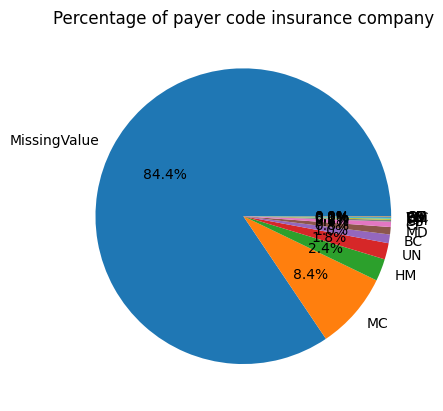

In [ ]:
plt.figure()
plt.pie(data['payer_code'].value_counts(), labels= data['payer_code'].value_counts().index, autopct="%1.1f%%")
plt.title("Percentage of payer code insurance company")
plt.show()

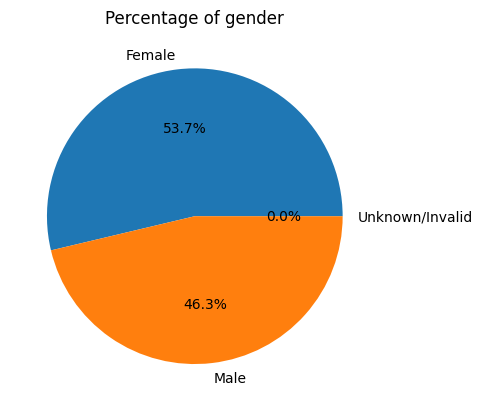

In [ ]:
plt.figure()
plt.pie(data['gender'].value_counts(), labels= data['gender'].value_counts().index, autopct="%1.1f%%")
plt.title("Percentage of gender")
plt.show()

In [ ]:
data['diag_3'].value_counts().head(20)

250       4191
401       2972
414       1411
276       1334
428       1307
427       1227
?          873
496        831
403        648
272        643
250.01     587
599        571
V45        521
707        466
250.6      451
780        428
250.02     427
424        390
425        358
305        343
Name: diag_3, dtype: int64

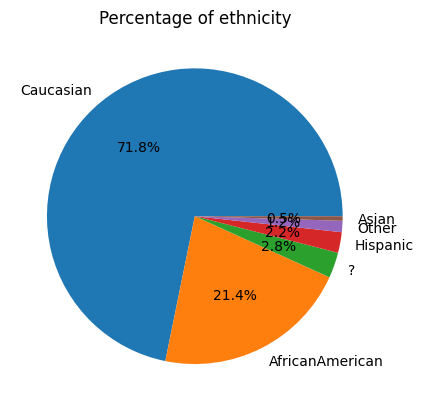

In [ ]:
plt.figure()
plt.pie(data['race'].value_counts(), labels= data['race'].value_counts().index, autopct="%1.1f%%")
plt.title("Percentage of ethnicity")
plt.show()

In [ ]:
data_caucasian = data[data['race']=="Caucasian"]
data_caucasian['race'].value_counts()

Caucasian    23869
Name: race, dtype: int64

In [ ]:
data_african_american = data[data['race']=="AfricanAmerican"]
data_african_american['race'].value_counts()

AfricanAmerican    7119
Name: race, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

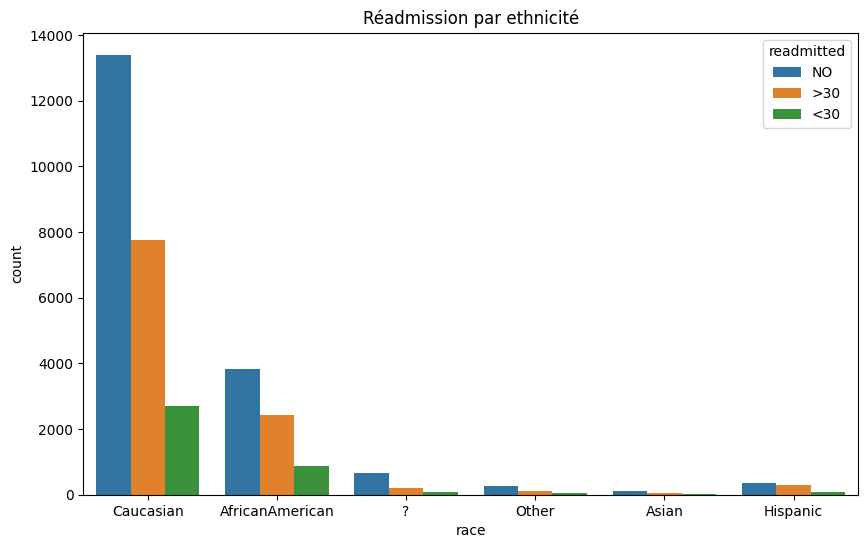

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='readmitted', data=data)
plt.title('Réadmission par ethnicité')
plt.show()

In [ ]:
mean_tih_emergency= np.mean(data[data["admission_type_id"]=="Emergency"]["time_in_hospital"])
mean_tih_emergency

4.643068574247657

In [ ]:
mean_tih_not_mapped= np.mean(data[data["admission_type_id"]=="Not Mapped"]["time_in_hospital"])
mean_tih_not_mapped

1.2727272727272727

In [ ]:
mean_tih = data.groupby('admission_type_id')["time_in_hospital"].mean().reset_index()

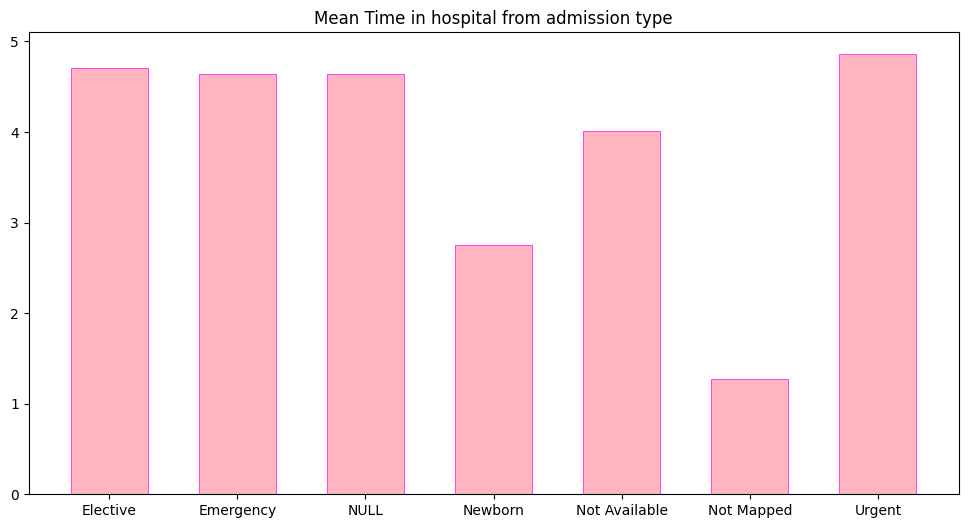

In [ ]:
plt.figure(figsize =(12,6))
plt.bar(mean_tih['admission_type_id'], mean_tih['time_in_hospital'], width=0.6, color = 'lightpink', edgecolor = 'fuchsia',linewidth = 0.5)
plt.title('Mean Time in hospital from admission type')
plt.show()

Text(0, 0.5, 'Nombre de patients')

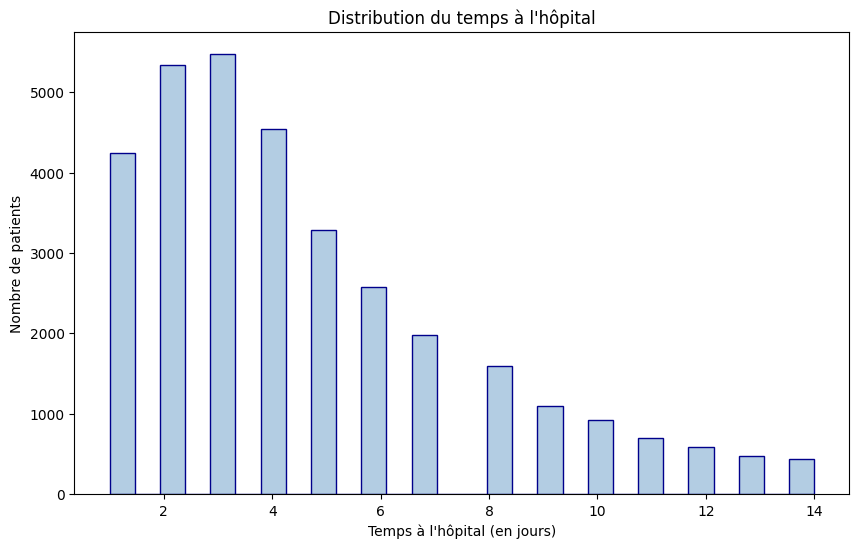

In [ ]:
custom_palette =sns.color_palette("Pastel1", 3)

time_in_hospital = data['time_in_hospital']

plt.figure(figsize=(10, 6))
plt.hist(time_in_hospital, bins=28, color=custom_palette[1], edgecolor='darkblue',linewidth =1)
plt.title('Distribution du temps à l\'hôpital')
plt.xlabel('Temps à l\'hôpital (en jours)')
plt.ylabel('Nombre de patients')

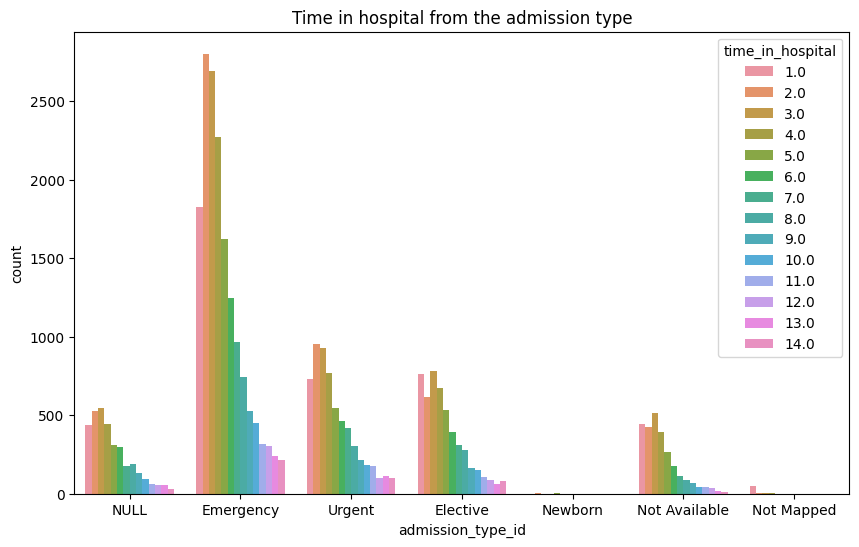

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='admission_type_id', hue='time_in_hospital', data=data)
plt.title('Time in hospital from the admission type')
plt.show()

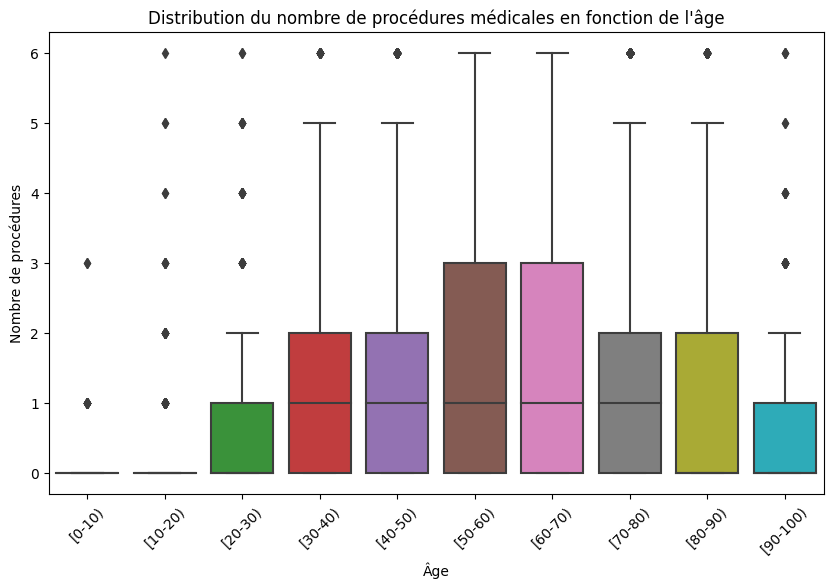

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='num_procedures', data=data)
plt.title('Distribution du nombre de procédures médicales en fonction de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de procédures')
plt.xticks(rotation=45)
plt.show()

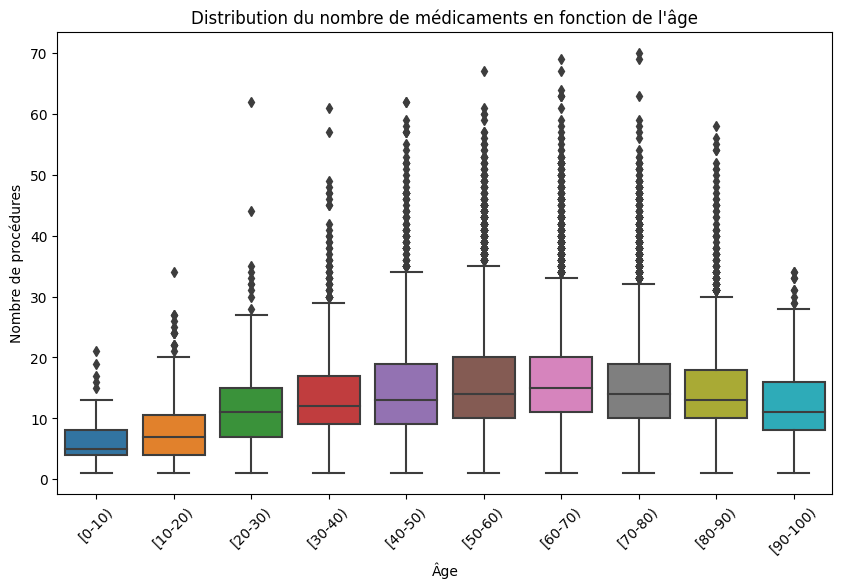

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='num_medications', data=data)
plt.title('Distribution du nombre de médicaments en fonction de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de procédures')
plt.xticks(rotation=45)
plt.show()

In [ ]:
'admission_type_id','time_in_hospital', 'race', 'gender', 'age', 'payer_code'

('admission_type_id',
 'time_in_hospital',
 'race',
 'gender',
 'age',
 'payer_code')

<ipython-input-55-5d25d0b8ac09>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_df.corr()


Text(0.5, 1.0, 'Matrice de corrélation avec la réadmission')

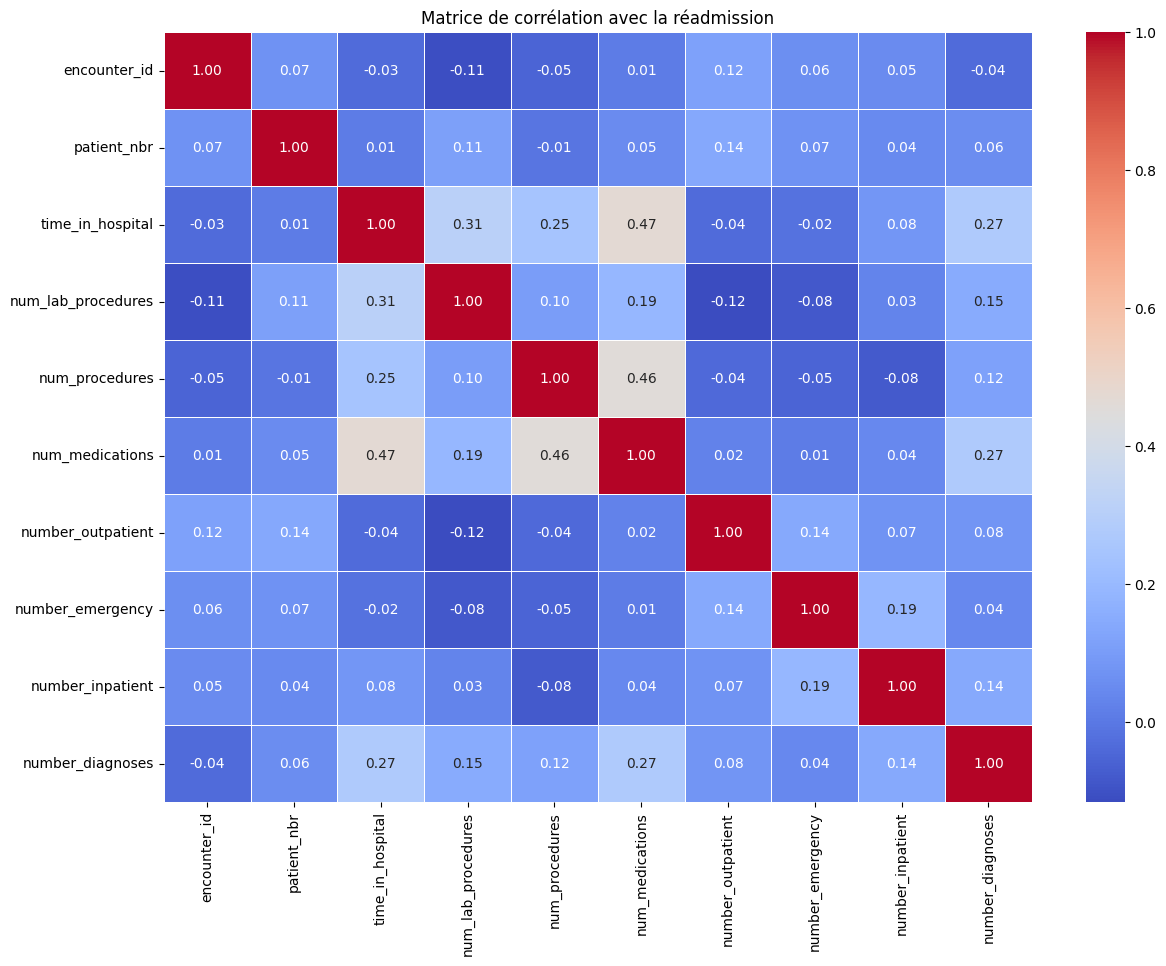

In [ ]:
columns_for_correlation = data.select_dtypes(include=['int64', 'float64']).columns

columns_for_correlation = columns_for_correlation.append(pd.Index(['readmitted']))

correlation_df = data[columns_for_correlation]

correlation_matrix = correlation_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de corrélation avec la réadmission')

Text(0.5, 1.0, 'Distribution de la réadmission')

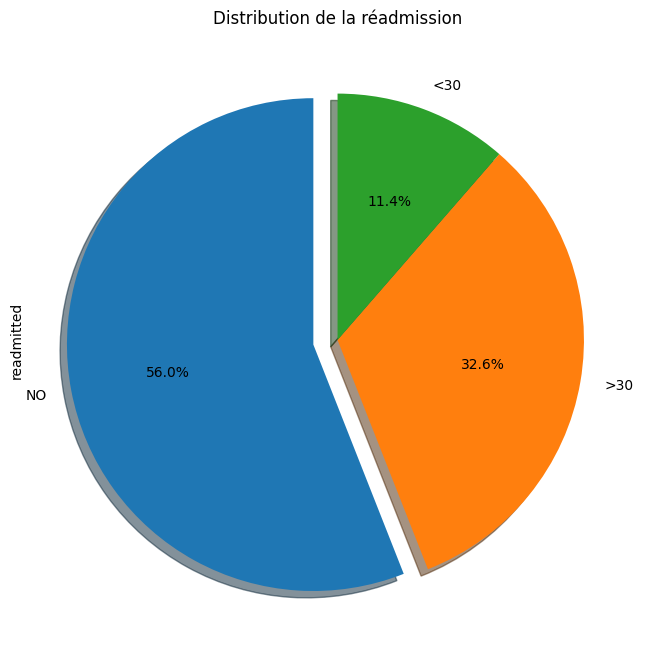

In [ ]:
plt.figure(figsize=(8, 8))
data['readmitted'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0.1, 0, 0), shadow=True)
plt.title('Distribution de la réadmission')

Text(0, 0.5, 'Nombre de cas')

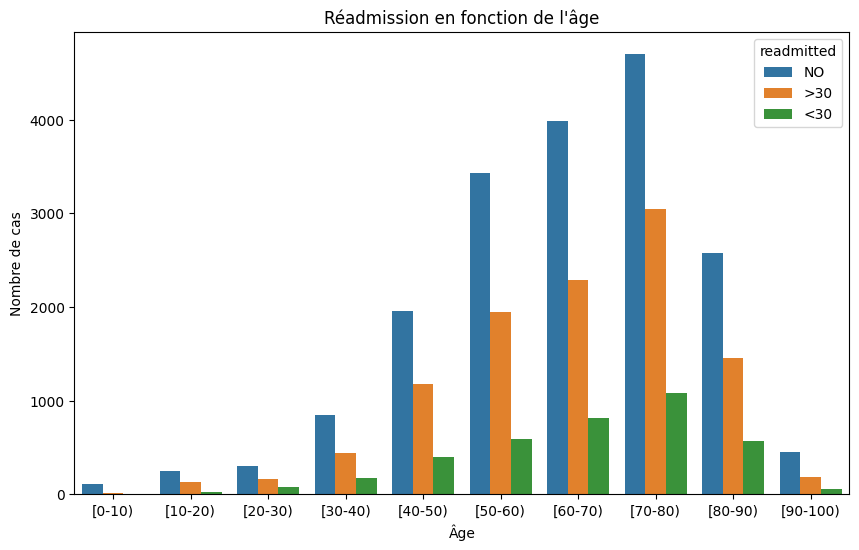

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='readmitted', data=data)
plt.title('Réadmission en fonction de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de cas')

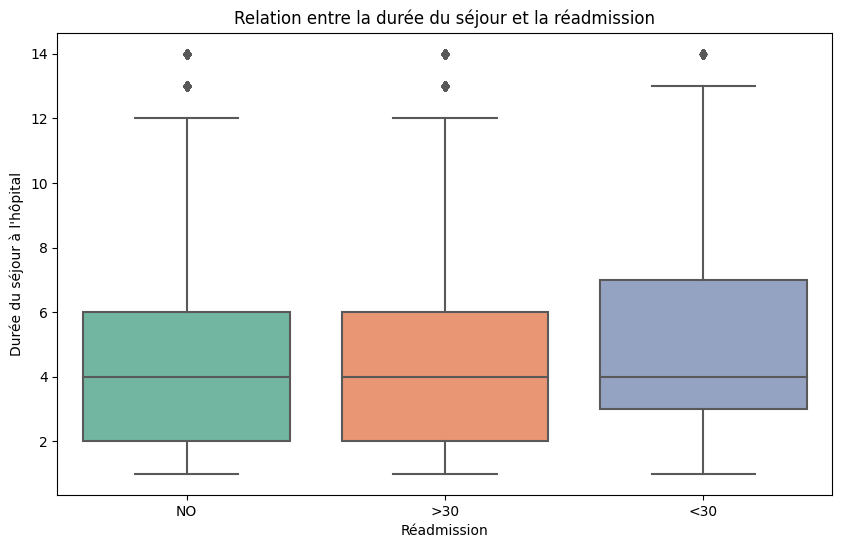

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=data, palette='Set2', order=['NO', '>30', '<30'])
plt.title('Relation entre la durée du séjour et la réadmission')
plt.xlabel('Réadmission')
plt.ylabel('Durée du séjour à l\'hôpital')
plt.show()


Text(0, 0.5, 'Nombre de médicaments')

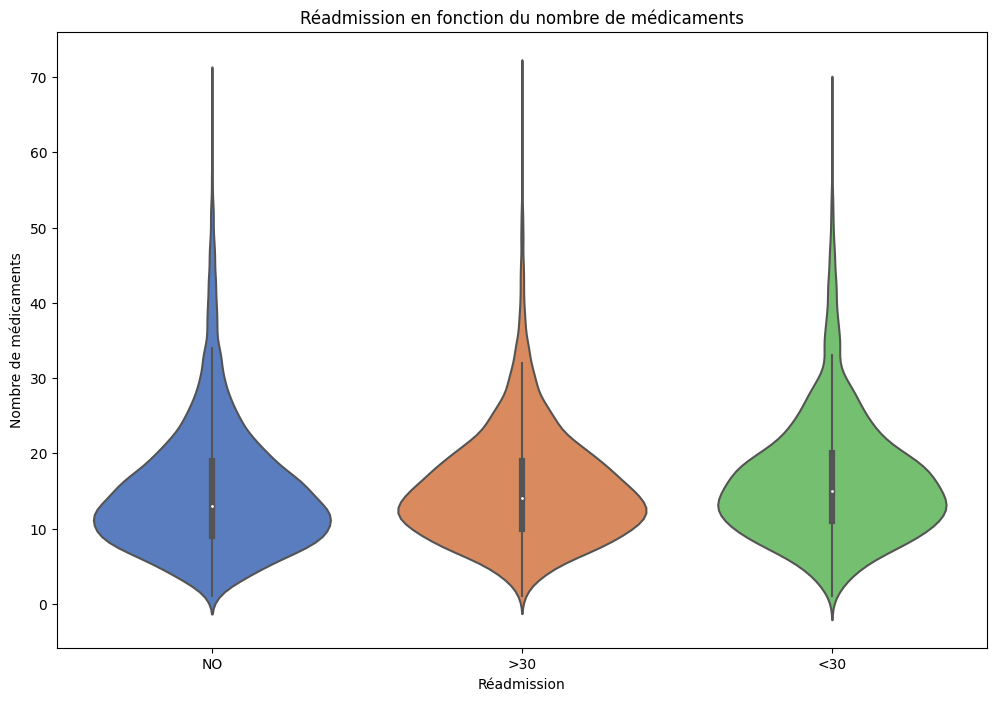

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='readmitted', y='num_medications', data=data, palette='muted')
plt.title('Réadmission en fonction du nombre de médicaments')
plt.xlabel('Réadmission')
plt.ylabel('Nombre de médicaments')

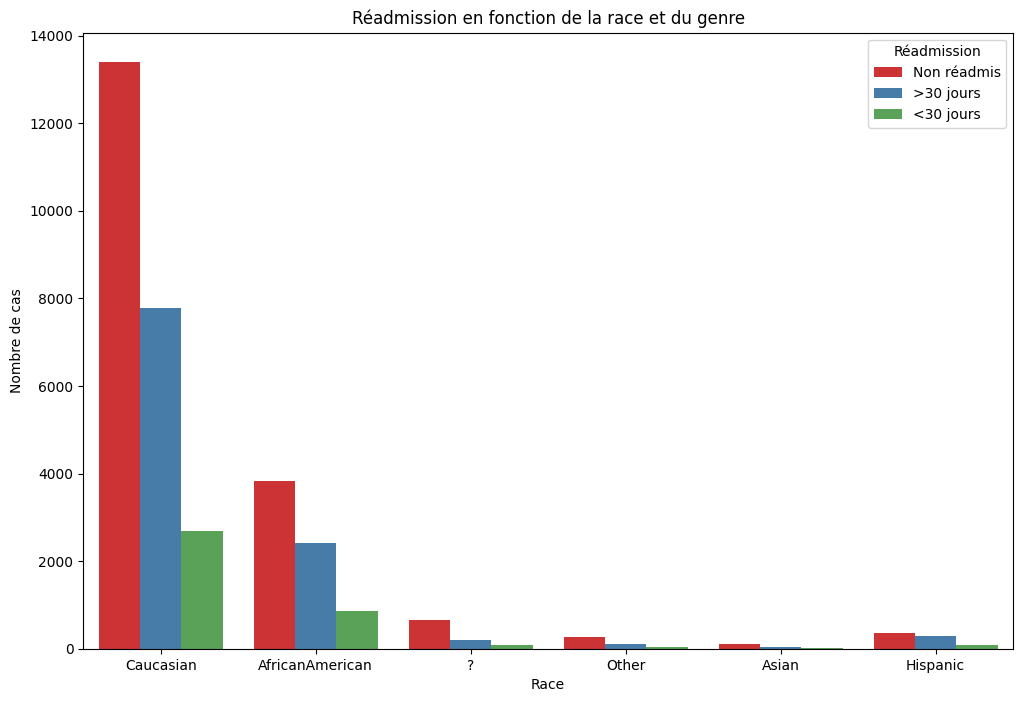

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='race', hue='readmitted', data=data, palette='Set1', hue_order=['NO', '>30', '<30'])
plt.title('Réadmission en fonction de la race et du genre')
plt.xlabel('Race')
plt.ylabel('Nombre de cas')
plt.legend(title='Réadmission', loc='upper right', labels=['Non réadmis', '>30 jours', '<30 jours'])

Text(0.5, 1.0, "Relation entre l'âge, de la durée du séjour et de la réadmission à l'hôpital")

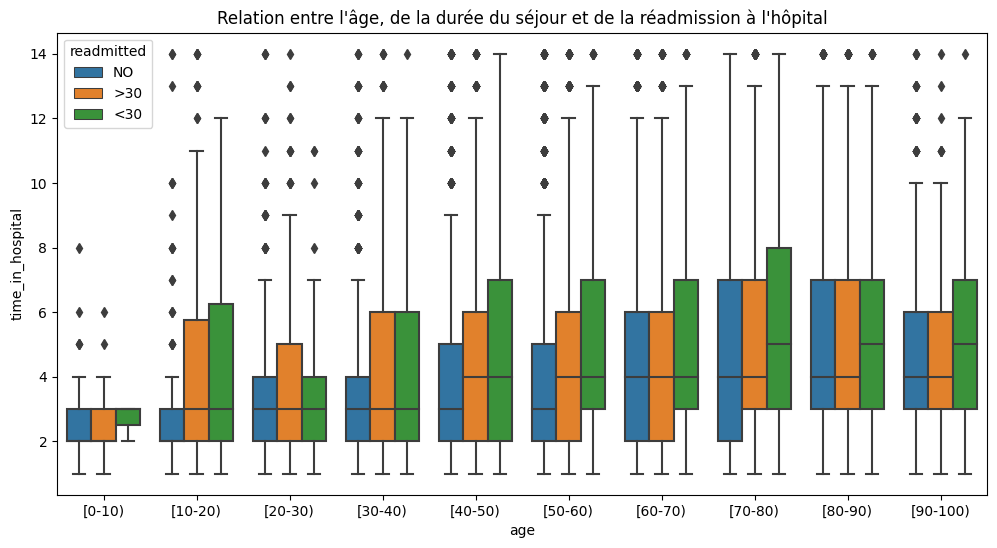

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='time_in_hospital', hue='readmitted', data=data)
plt.title('Relation entre l\'âge, de la durée du séjour et de la réadmission à l\'hôpital')

<Figure size 1000x600 with 0 Axes>

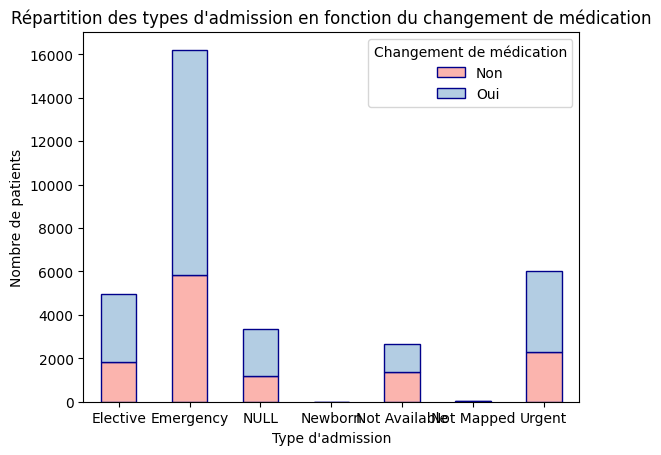

In [ ]:
custom_palette =sns.color_palette("Pastel1", 8)
subset_data = data[['admission_type_id', 'change']]

grouped_data = subset_data.groupby(['admission_type_id', 'change']).size().unstack()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True,color=custom_palette, edgecolor='darkblue')
plt.title('Répartition des types d\'admission en fonction du changement de médication')
plt.xlabel('Type d\'admission')
plt.ylabel('Nombre de patients')
plt.xticks(rotation=0)
plt.legend(title='Changement de médication', loc='upper right', labels=['Non', 'Oui'])

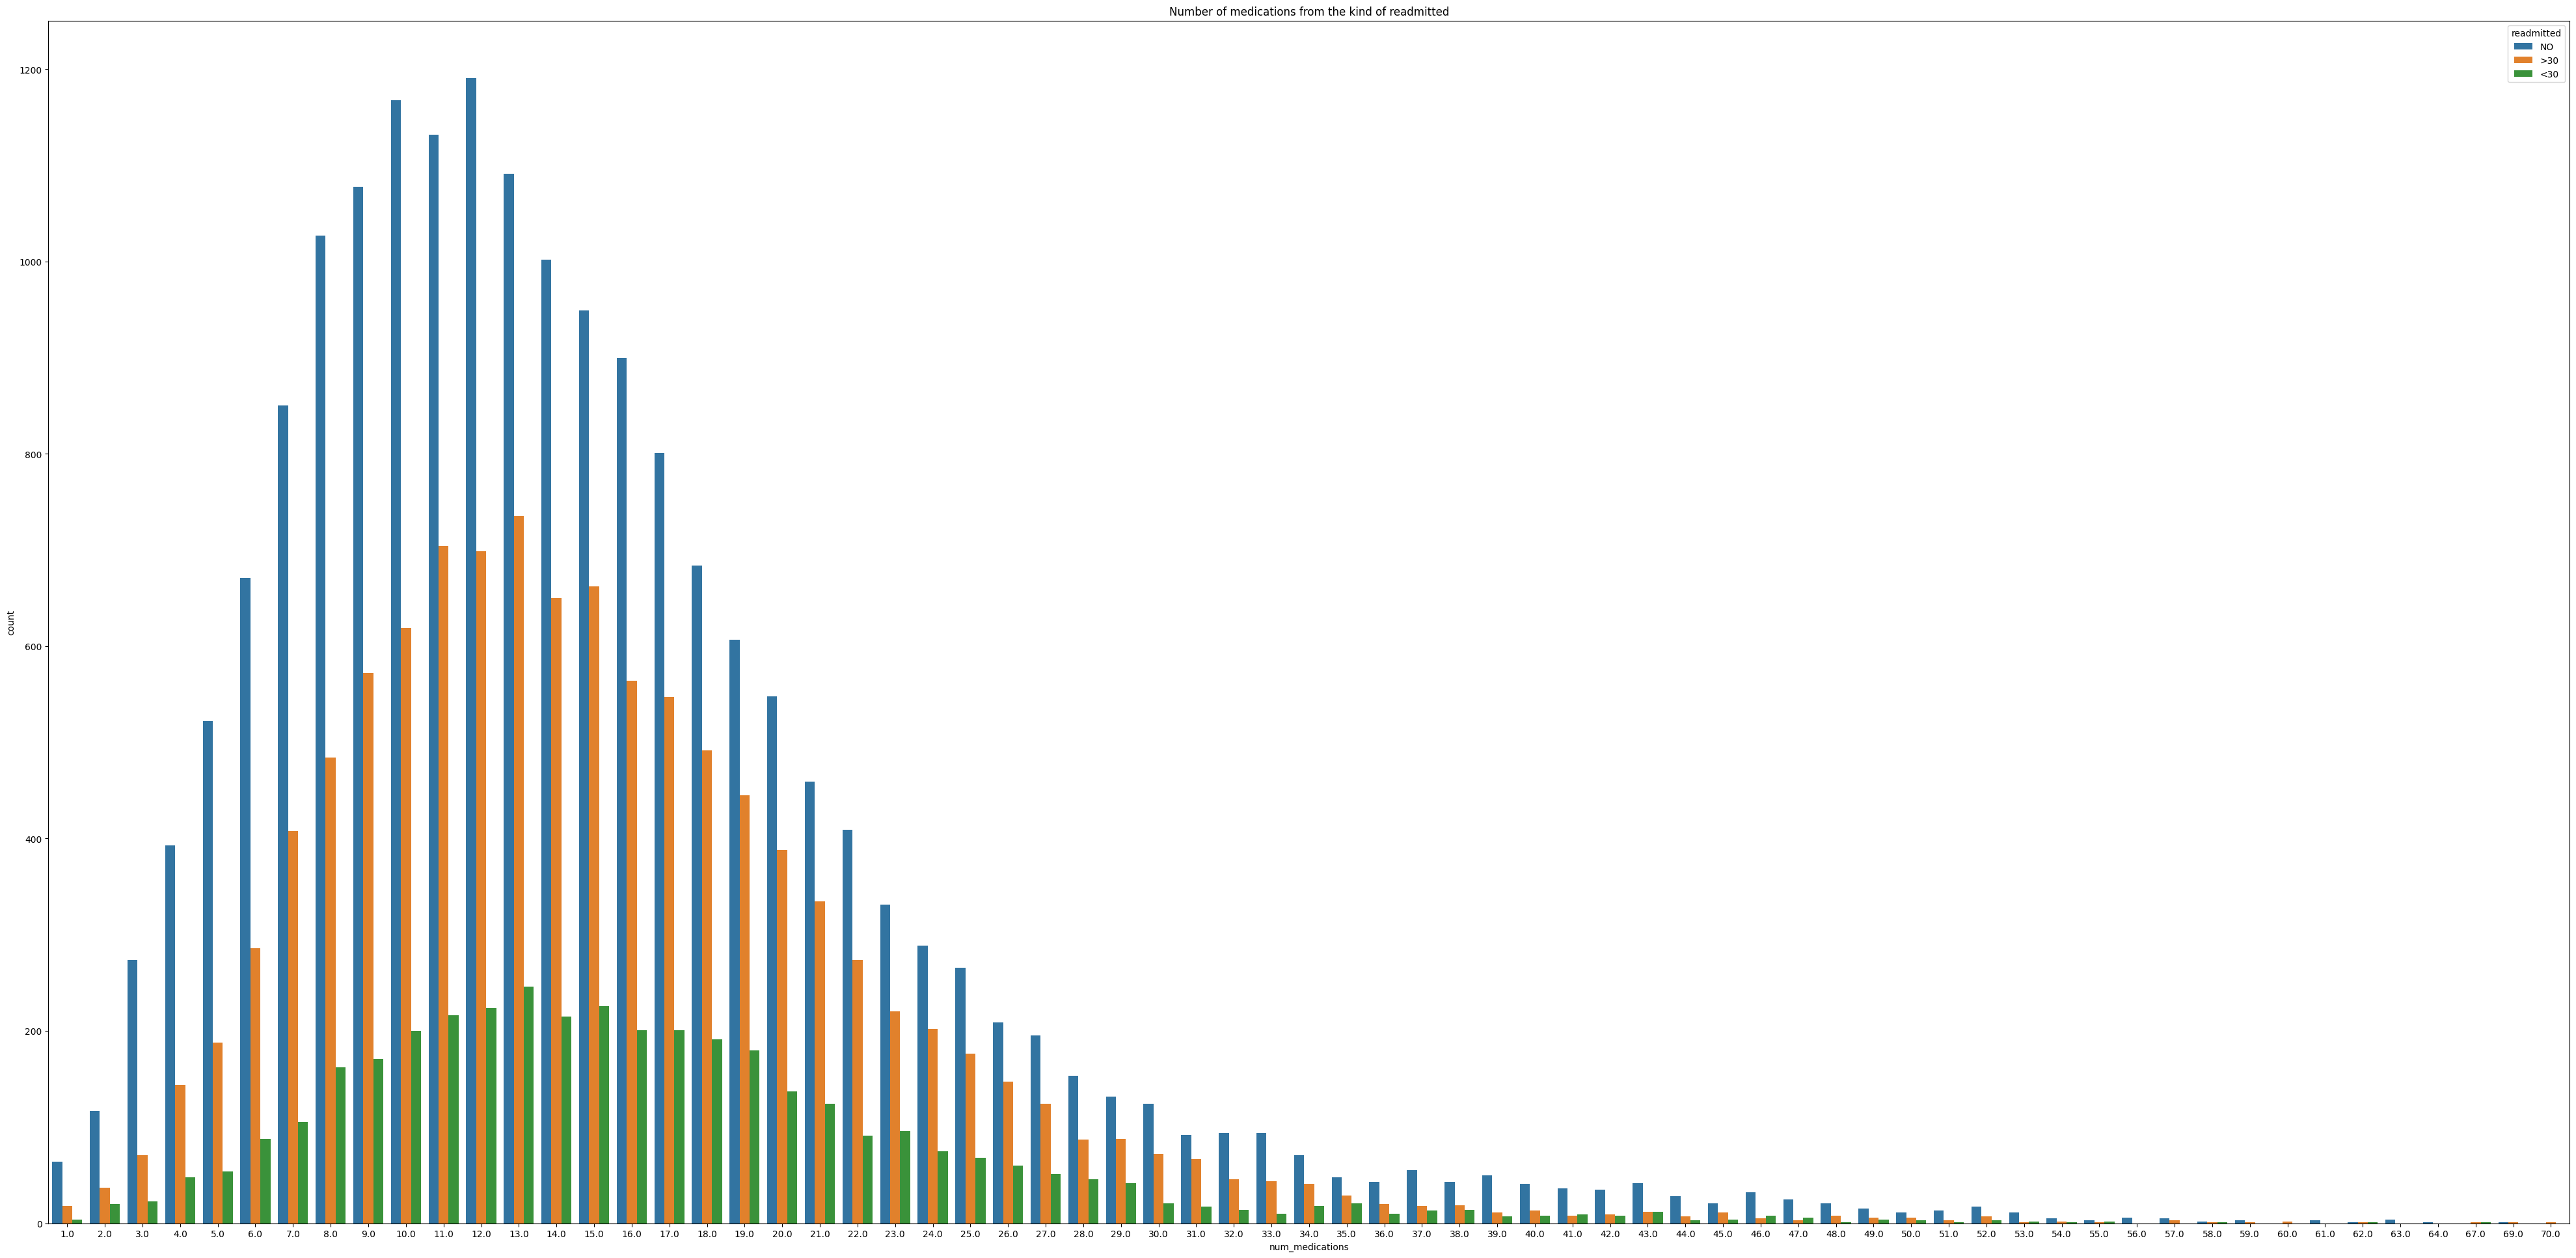

In [ ]:
plt.figure(figsize=(50, 24))
sns.countplot(x='num_medications', hue='readmitted', data=data)
plt.title('Number of medications from the kind of readmitted')
plt.show()

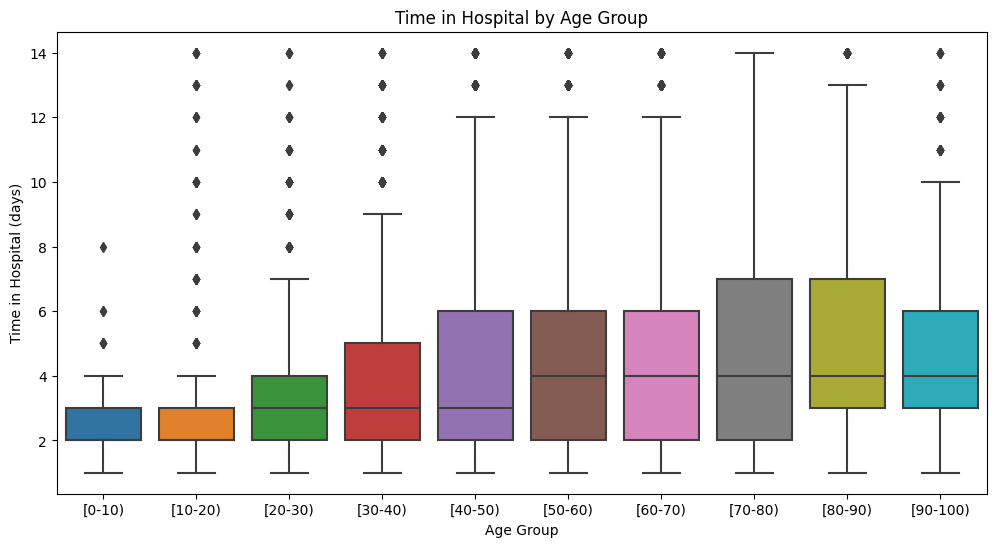

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='time_in_hospital', data=data)
plt.title('Time in Hospital by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Time in Hospital (days)')
plt.show()

<ipython-input-65-27969da6cce9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='num_medications', y='time_in_hospital', data=data, ci=None)


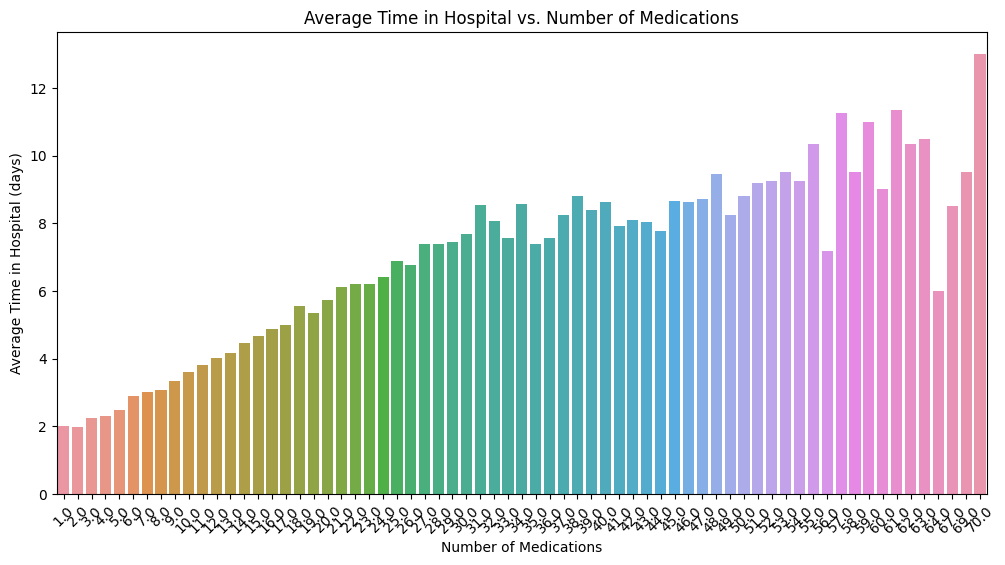

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='num_medications', y='time_in_hospital', data=data, ci=None)
plt.title('Average Time in Hospital vs. Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Average Time in Hospital (days)')
plt.xticks(rotation=45)
plt.show()

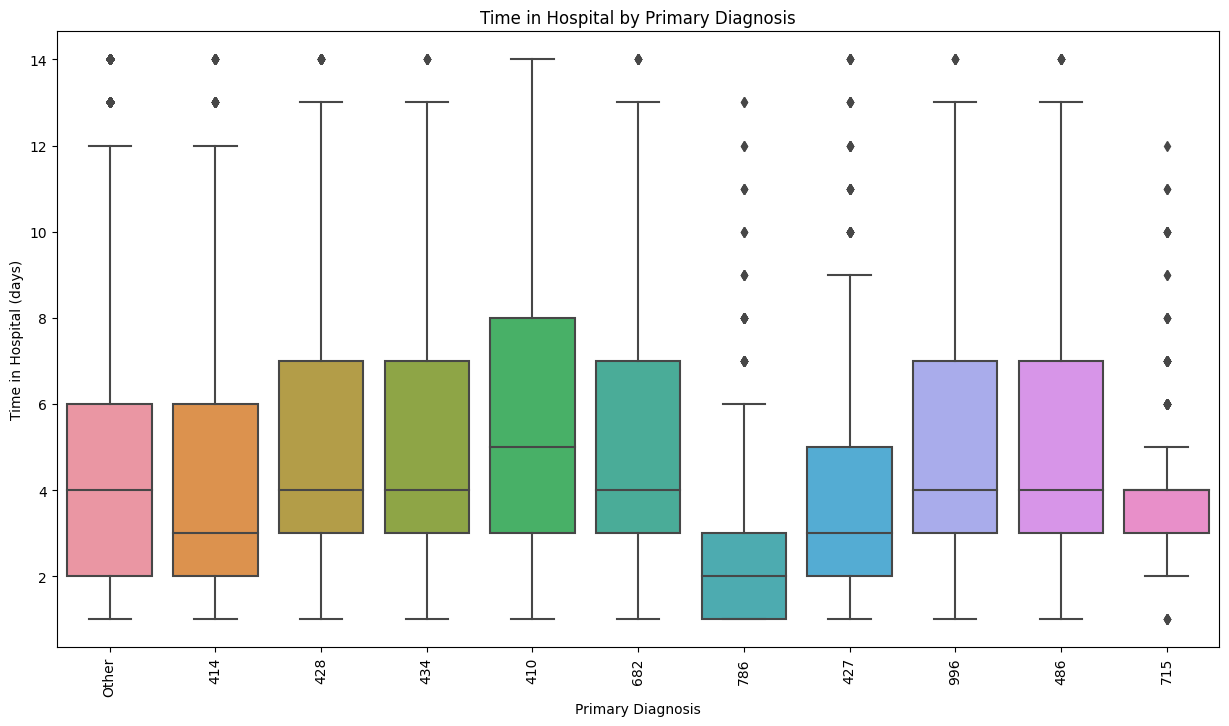

In [ ]:
diag_counts1 = data['diag_1'].value_counts()

top_diagnoses1 = diag_counts1.head(10).index

data['selected_diag_1'] = data['diag_1'].where(data['diag_1'].isin(top_diagnoses1), 'Other')

plt.figure(figsize=(15, 8))
sns.boxplot(x='selected_diag_1', y='time_in_hospital', data=data)
plt.title('Time in Hospital by Primary Diagnosis')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Time in Hospital (days)')
plt.xticks(rotation=90)
plt.show()

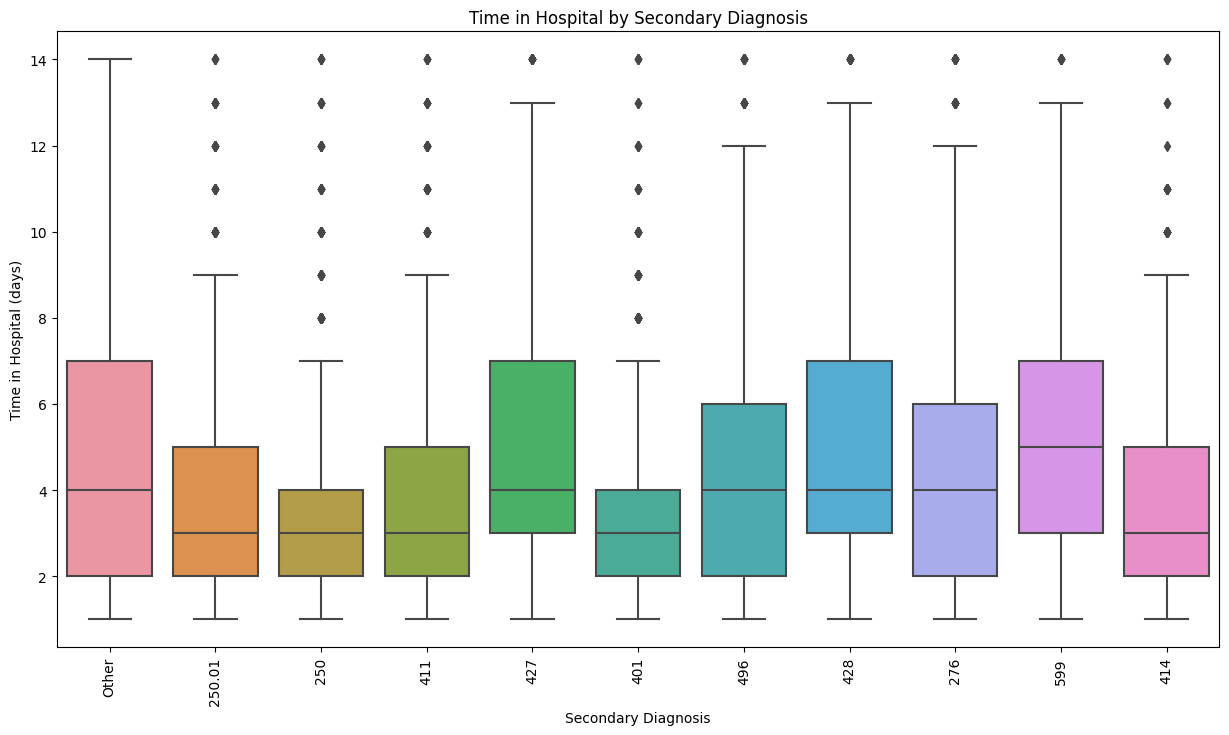

In [ ]:
diag_counts2 = data['diag_2'].value_counts()

top_diagnoses2 = diag_counts2.head(10).index

data['selected_diag_2'] = data['diag_2'].where(data['diag_2'].isin(top_diagnoses2), 'Other')

plt.figure(figsize=(15, 8))
sns.boxplot(x='selected_diag_2', y='time_in_hospital', data=data)
plt.title('Time in Hospital by Secondary Diagnosis')
plt.xlabel('Secondary Diagnosis')
plt.ylabel('Time in Hospital (days)')
plt.xticks(rotation=90)
plt.show()

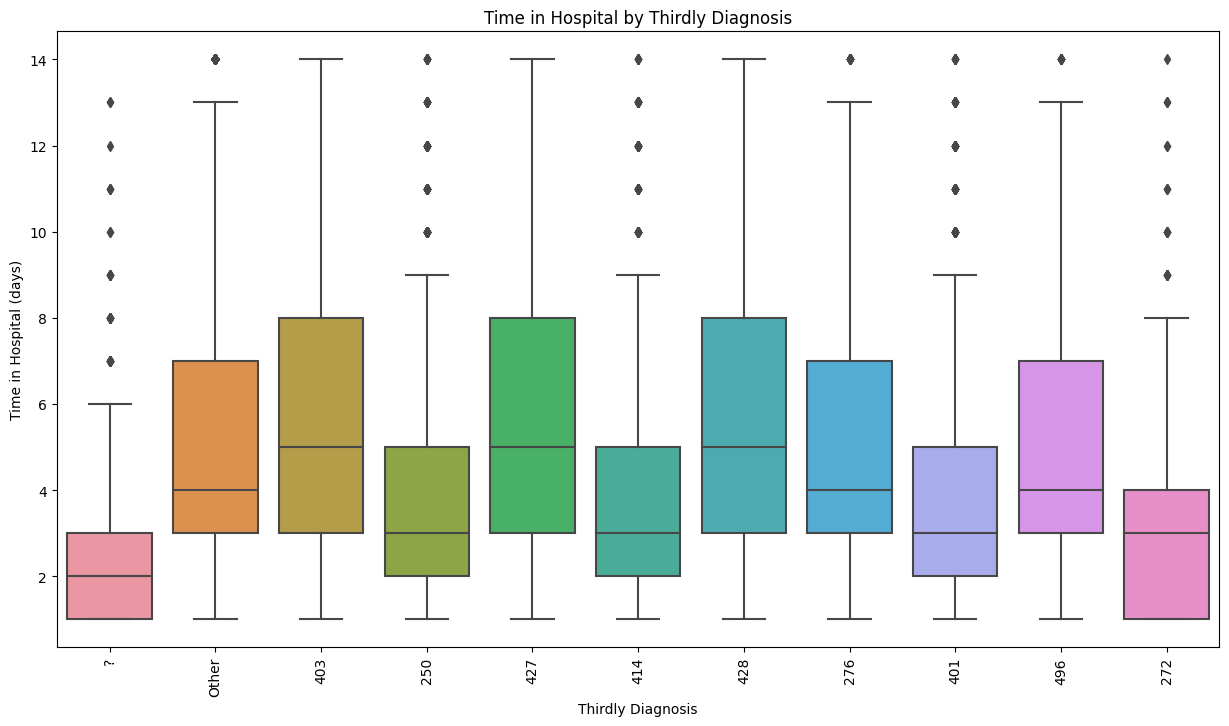

In [ ]:
diag_counts3 = data['diag_3'].value_counts()

top_diagnoses3 = diag_counts3.head(10).index

data['selected_diag_3'] = data['diag_3'].where(data['diag_3'].isin(top_diagnoses3), 'Other')

plt.figure(figsize=(15, 8))
sns.boxplot(x='selected_diag_3', y='time_in_hospital', data=data)
plt.title('Time in Hospital by Thirdly Diagnosis')
plt.xlabel('Thirdly Diagnosis')
plt.ylabel('Time in Hospital (days)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

X = data.drop('time_in_hospital', axis=1)
y = data['time_in_hospital']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier()
print("Training Random Forest...")
rf_model.fit(X_train, y_train)

y_pred_RF = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_RF)
print(f"\nRandom Forest Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_RF)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_RF)}\n")

Training Random Forest...

Random Forest Accuracy: 0.2303
Classification Report:
              precision    recall  f1-score   support

         1.0       0.45      0.47      0.46       867
         2.0       0.26      0.36      0.31      1090
         3.0       0.22      0.34      0.26      1037
         4.0       0.16      0.21      0.18       892
         5.0       0.12      0.10      0.11       631
         6.0       0.12      0.07      0.09       523
         7.0       0.13      0.07      0.09       396
         8.0       0.14      0.08      0.10       329
         9.0       0.12      0.04      0.06       240
        10.0       0.13      0.04      0.06       191
        11.0       0.28      0.05      0.08       150
        12.0       0.12      0.03      0.05       105
        13.0       0.00      0.00      0.00       106
        14.0       0.25      0.07      0.10        92

    accuracy                           0.23      6649
   macro avg       0.18      0.14      0.14      6649

In [ ]:
param_grid = {
    'n_estimators': [100,200],
    'max_features': ['auto'],
    'max_depth': [4, 8],
    'criterion': ['gini']
}

CV_model = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3,n_jobs=-1)

CV_model.fit(X_train, y_train)

print("Meilleurs paramètres : ", CV_model.best_params_)

best_rf_model = CV_model.best_estimator_

y_pred_best_rf = best_rf_model.predict(X_test)

rf_accuracy_best = accuracy_score(y_test, y_pred_best_rf)
print(f"\nBest Random Forest Accuracy: {rf_accuracy_best:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_best_rf)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_best_rf)}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Meilleurs paramètres :  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}

Best Random Forest Accuracy: 0.2307
Classification Report:
              precision    recall  f1-score   support

         1.0       0.50      0.40      0.45       867
         2.0       0.29      0.45      0.35      1090
         3.0       0.19      0.46      0.27      1037
         4.0       0.13      0.17      0.15       892
         5.0       0.11      0.05      0.07       631
         6.0       0.08      0.02      0.04       523
         7.0       0.10      0.01      0.02       396
         8.0       0.10      0.04      0.06       329
         9.0       0.12      0.00      0.01       240
        10.0       0.29      0.01      0.02       191
        11.0       0.00      0.00      0.00       150
        12.0       0.00      0.00      0.00       105
        13.0       0.00      0.00      0.00       106
        14.0       0.00      0.00      0.00        92

    accuracy         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


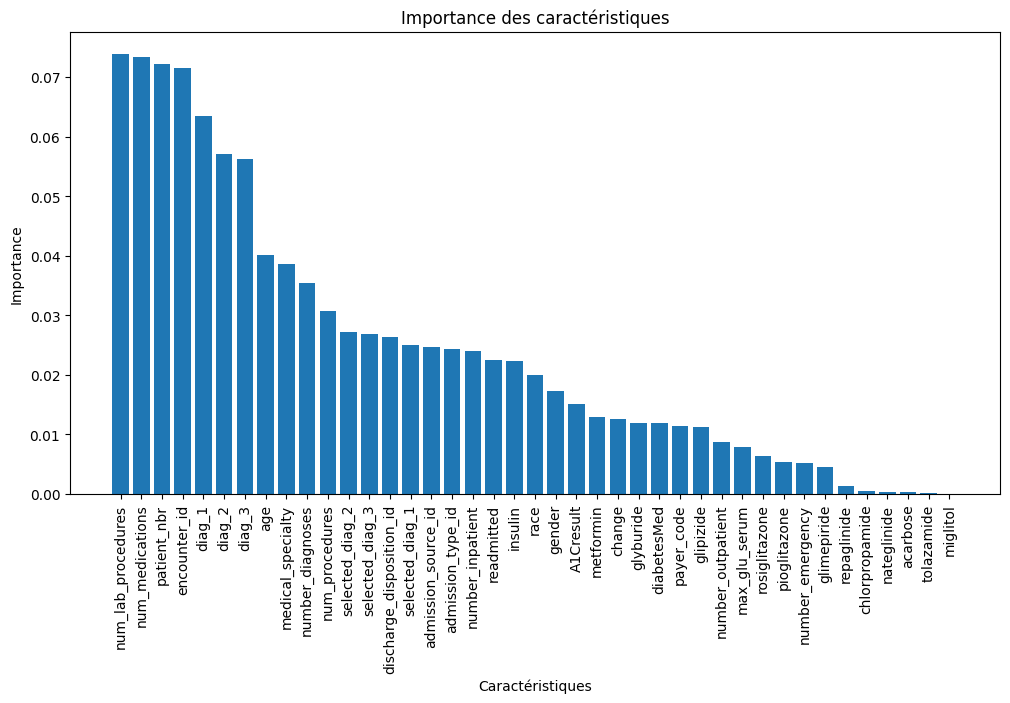

In [ ]:
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importance des caractéristiques")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Importance')
plt.show()

In [ ]:
print("Rapport de Classification :")
print(classification_report(y_test, y_pred_best_rf))

Rapport de Classification :
              precision    recall  f1-score   support

         1.0       0.50      0.40      0.45       867
         2.0       0.29      0.45      0.35      1090
         3.0       0.19      0.46      0.27      1037
         4.0       0.13      0.17      0.15       892
         5.0       0.11      0.05      0.07       631
         6.0       0.08      0.02      0.04       523
         7.0       0.10      0.01      0.02       396
         8.0       0.10      0.04      0.06       329
         9.0       0.12      0.00      0.01       240
        10.0       0.29      0.01      0.02       191
        11.0       0.00      0.00      0.00       150
        12.0       0.00      0.00      0.00       105
        13.0       0.00      0.00      0.00       106
        14.0       0.00      0.00      0.00        92

    accuracy                           0.23      6649
   macro avg       0.14      0.12      0.10      6649
weighted avg       0.20      0.23      0.19      664

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


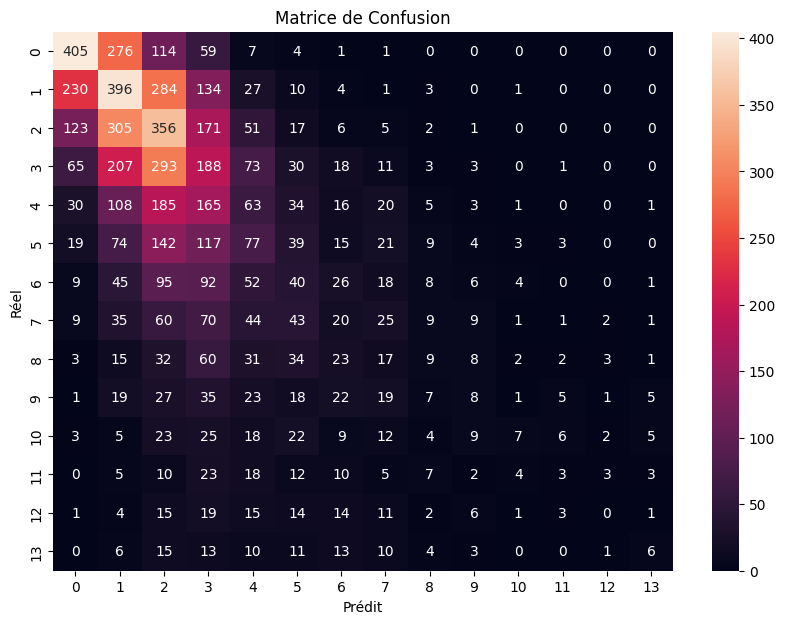

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_RF = rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


In [ ]:
model_knn = KNeighborsClassifier()
print("Training K-Nearest Neighbors...")
model_knn.fit(X_train, y_train)

y_pred_KNN = model_knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_KNN)
print(f"\nKNN Accuracy: {knn_accuracy:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_KNN)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_KNN)}\n")

Training K-Nearest Neighbors...

KNN Accuracy: 0.1432
Classification Report:
              precision    recall  f1-score   support

         1.0       0.14      0.28      0.18       867
         2.0       0.18      0.27      0.22      1090
         3.0       0.16      0.21      0.18      1037
         4.0       0.15      0.14      0.14       892
         5.0       0.11      0.07      0.09       631
         6.0       0.07      0.03      0.04       523
         7.0       0.03      0.01      0.02       396
         8.0       0.04      0.02      0.02       329
         9.0       0.02      0.00      0.01       240
        10.0       0.03      0.01      0.01       191
        11.0       0.00      0.00      0.00       150
        12.0       0.00      0.00      0.00       105
        13.0       0.00      0.00      0.00       106
        14.0       0.00      0.00      0.00        92

    accuracy                           0.14      6649
   macro avg       0.07      0.07      0.07      6649
wei

In [ ]:
parame_grid = {
    'n_neighbors': [1, 20, 50],
    #'weights': ['uniform', 'distance'],
    #'metric': ['manhattan','minkowski'],
    'leaf_size': [1,2]

}

model_knn= KNeighborsClassifier()
grid_search = GridSearchCV(model_knn, parame_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'leaf_size': 1, 'n_neighbors': 50}


In [ ]:
best_knn_model = grid_search.best_estimator_

y_pred_best_knn = best_knn_model.predict(X_test)

knn_accuracy_best = accuracy_score(y_test, y_pred_best_knn)
print(f"\nBest KNN Accuracy: {knn_accuracy_best:.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_best_knn)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_best_knn)}")


Best KNN Accuracy: 0.1512
Classification Report:
              precision    recall  f1-score   support

         1.0       0.14      0.17      0.15       867
         2.0       0.17      0.33      0.22      1090
         3.0       0.16      0.34      0.22      1037
         4.0       0.12      0.13      0.13       892
         5.0       0.09      0.03      0.05       631
         6.0       0.05      0.00      0.01       523
         7.0       0.22      0.01      0.01       396
         8.0       0.22      0.01      0.01       329
         9.0       0.00      0.00      0.00       240
        10.0       0.00      0.00      0.00       191
        11.0       0.00      0.00      0.00       150
        12.0       0.00      0.00      0.00       105
        13.0       0.00      0.00      0.00       106
        14.0       0.00      0.00      0.00        92

    accuracy                           0.15      6649
   macro avg       0.08      0.07      0.06      6649
weighted avg       0.12      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Rapport de Classification :")
print(classification_report(y_test, y_pred_KNN))

Rapport de Classification :
              precision    recall  f1-score   support

         1.0       0.14      0.28      0.18       867
         2.0       0.18      0.27      0.22      1090
         3.0       0.16      0.21      0.18      1037
         4.0       0.15      0.14      0.14       892
         5.0       0.11      0.07      0.09       631
         6.0       0.07      0.03      0.04       523
         7.0       0.03      0.01      0.02       396
         8.0       0.04      0.02      0.02       329
         9.0       0.02      0.00      0.01       240
        10.0       0.03      0.01      0.01       191
        11.0       0.00      0.00      0.00       150
        12.0       0.00      0.00      0.00       105
        13.0       0.00      0.00      0.00       106
        14.0       0.00      0.00      0.00        92

    accuracy                           0.14      6649
   macro avg       0.07      0.07      0.07      6649
weighted avg       0.11      0.14      0.12      664

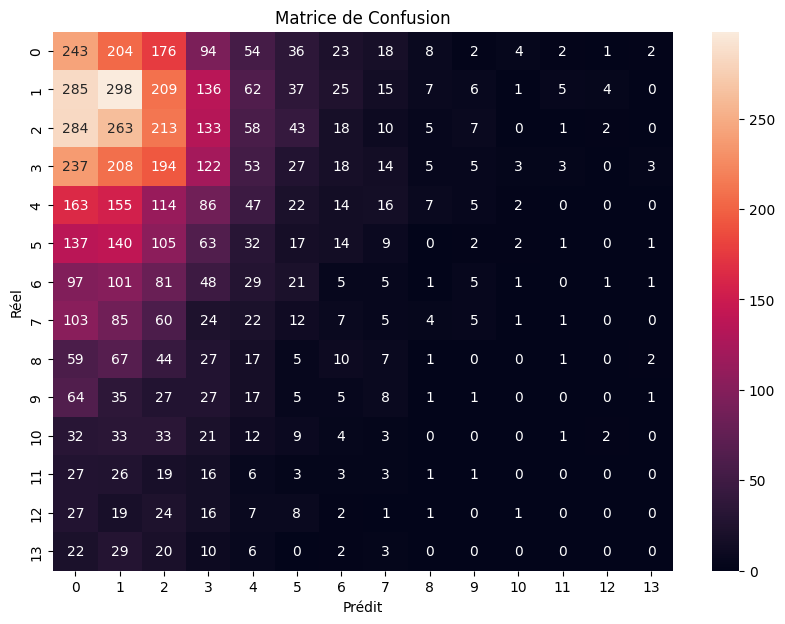

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_KNN)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


In [ ]:
accuracy_RF = accuracy_score(y_test, y_pred_RF)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)

print("Exactitude RandomForest:", accuracy_RF)
print("Exactitude K-NN:", accuracy_KNN)

Exactitude RandomForest: 0.23026018950218077
Exactitude K-NN: 0.14317942547751542


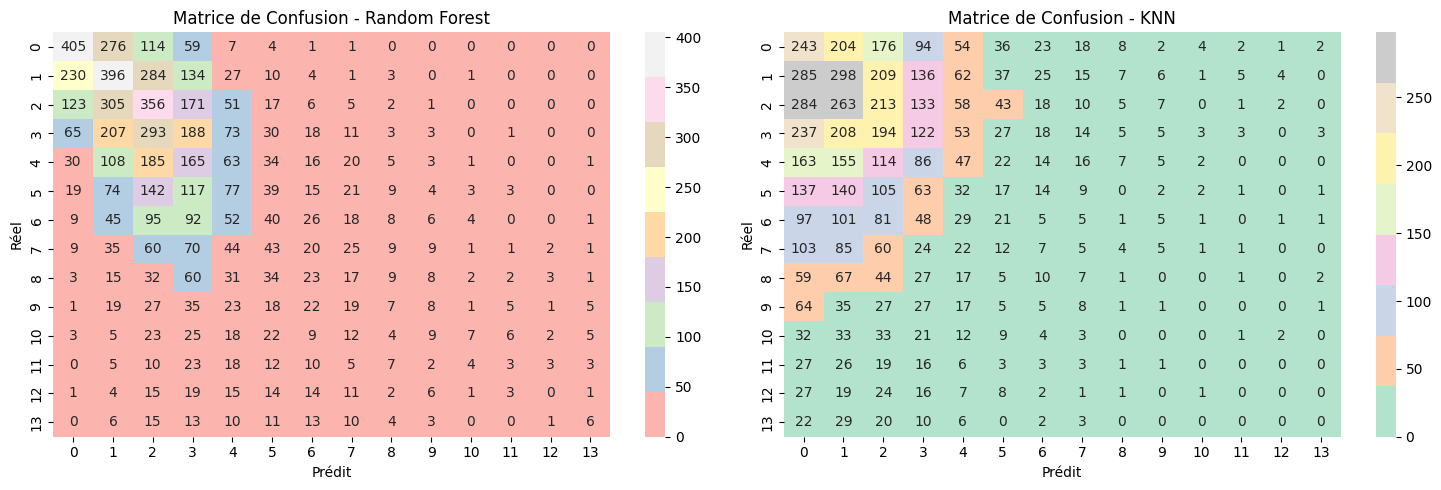

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_RF)
conf_matrix_KNN =confusion_matrix(y_test, y_pred_KNN)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

#Confusion matrice for Random Forest
sns.heatmap(conf_matrix_rf, annot=True, fmt='g', ax=axs[0], cmap='Pastel1')
axs[0].set_title('Matrice de Confusion - Random Forest')
axs[0].set_xlabel('Prédit')
axs[0].set_ylabel('Réel')

#Confusion matrice for KNN
sns.heatmap(conf_matrix_KNN, annot=True, fmt='g', ax=axs[1], cmap='Pastel2')
axs[1].set_title('Matrice de Confusion - KNN')
axs[1].set_xlabel('Prédit')
axs[1].set_ylabel('Réel')


plt.tight_layout()
plt.show()

In [ ]:
print("Classification report for the RF model :")
print(classification_report(y_test, y_pred_RF))
print("Classification report for the KNN model:")
print(classification_report(y_test, y_pred_KNN))

Classification report for the RF model :
              precision    recall  f1-score   support

         1.0       0.45      0.47      0.46       867
         2.0       0.26      0.36      0.31      1090
         3.0       0.22      0.34      0.26      1037
         4.0       0.16      0.21      0.18       892
         5.0       0.12      0.10      0.11       631
         6.0       0.12      0.07      0.09       523
         7.0       0.13      0.07      0.09       396
         8.0       0.14      0.08      0.10       329
         9.0       0.12      0.04      0.06       240
        10.0       0.13      0.04      0.06       191
        11.0       0.28      0.05      0.08       150
        12.0       0.12      0.03      0.05       105
        13.0       0.00      0.00      0.00       106
        14.0       0.25      0.07      0.10        92

    accuracy                           0.23      6649
   macro avg       0.18      0.14      0.14      6649
weighted avg       0.21      0.23      

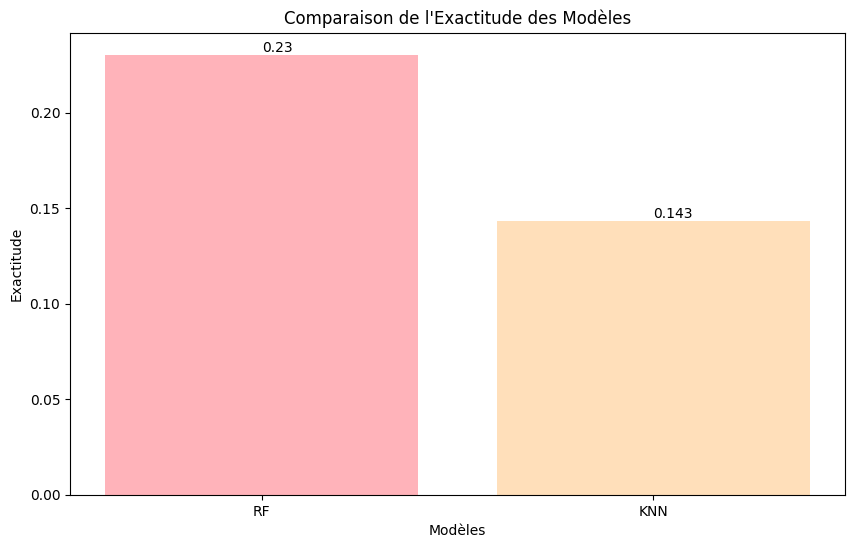

In [ ]:
results = {
    'RF': accuracy_RF,
    'KNN': accuracy_KNN
}

model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
bars =plt.bar(model_names, accuracies, color=['#ffb3ba', '#ffdfba','#bae1ff'])


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom')  # Afficher la valeur au-dessus de la barre


plt.title('Comparaison de l\'Exactitude des Modèles')
plt.xlabel('Modèles')
plt.ylabel('Exactitude')

plt.show()

In [ ]:
pip install xgboost lightgbm catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
import lightgbm as lgb
import catboost

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop('time_in_hospital', axis=1)
y = data['time_in_hospital']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train - 1
y_test= y_test - 1

xgb_model = xgb.XGBClassifier(objective="multi:softmax", num_class=14, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

catboost_model = catboost.CatBoostClassifier(random_state=42)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)

print("Exactitude XGBoost:", accuracy_xgb)
print("Exactitude LightGBM:", accuracy_lgb)
print("Exactitude CatBoost:", accuracy_catboost)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1640
[LightGBM] [Info] Number of data points in the train set: 26593, number of used features: 40
[LightGBM] [Info] Start training from score -2.063956
[LightGBM] [Info] Start training from score -1.834906
[LightGBM] [Info] Start training from score -1.791346
[LightGBM] [Info] Start training from score -1.985099
[LightGBM] [Info] Start training from score -2.306088
[LightGBM] [Info] Start training from score -2.561833
[LightGBM] [Info] Start training from score -2.819433
[LightGBM] [Info] Start training from score -3.040844
[LightGBM] [Info] Start training from score -3.438472
[LightGBM] [Info] Start training from score -3.599477
[LightGBM] [Info] Start training from score -3.871239
[LightGBM] [Info] Start training from score -4.022985

In [ ]:
param_grid = {
    'n_estimators': [300, 350],
    'max_depth': [3, 5],
    'learning_rate': [0.12,0.18],
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print("Meilleurs paramètres XGBoost:", grid_search_xgb.best_params_)
print("Exactitude du meilleur modèle XGBoost:", accuracy_best_xgb)

Meilleurs paramètres XGBoost: {'learning_rate': 0.12, 'max_depth': 3, 'n_estimators': 300}
Exactitude du meilleur modèle XGBoost: 0.2474056249060009


In [ ]:
grid_search_catboost = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search_catboost.fit(X_train, y_train)
best_catboost_model = grid_search_catboost.best_estimator_
y_pred_best_catboost = best_catboost_model.predict(X_test)
accuracy_best_catboost = accuracy_score(y_test, y_pred_best_catboost)
print("Meilleurs paramètres CatBoost:", grid_search_catboost.best_params_)
print("Exactitude du meilleur modèle CatBoost:", accuracy_best_catboost)

0:	learn: 2.5132198	total: 73.8ms	remaining: 22.1s
1:	learn: 2.4202336	total: 161ms	remaining: 24s
2:	learn: 2.3529044	total: 252ms	remaining: 25s
3:	learn: 2.3007581	total: 336ms	remaining: 24.9s
4:	learn: 2.2641497	total: 420ms	remaining: 24.8s
5:	learn: 2.2368048	total: 501ms	remaining: 24.6s
6:	learn: 2.2164357	total: 599ms	remaining: 25.1s
7:	learn: 2.1958645	total: 679ms	remaining: 24.8s
8:	learn: 2.1774992	total: 761ms	remaining: 24.6s
9:	learn: 2.1635525	total: 842ms	remaining: 24.4s
10:	learn: 2.1492217	total: 926ms	remaining: 24.3s
11:	learn: 2.1390374	total: 1.01s	remaining: 24.2s
12:	learn: 2.1309169	total: 1.09s	remaining: 24s
13:	learn: 2.1221668	total: 1.16s	remaining: 23.8s
14:	learn: 2.1130006	total: 1.23s	remaining: 23.3s
15:	learn: 2.1072952	total: 1.32s	remaining: 23.4s
16:	learn: 2.1000662	total: 1.39s	remaining: 23.1s
17:	learn: 2.0908126	total: 1.47s	remaining: 23.1s
18:	learn: 2.0872409	total: 1.54s	remaining: 22.8s
19:	learn: 2.0808088	total: 1.62s	remaining: 2

In [ ]:
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)
best_lgb_model = grid_search_lgb.best_estimator_
y_pred_best_lgb = best_lgb_model.predict(X_test)
accuracy_best_lgb = accuracy_score(y_test, y_pred_best_lgb)
print("Meilleurs paramètres LightGBM:", grid_search_lgb.best_params_)
print("Exactitude du meilleur modèle LightGBM:", accuracy_best_lgb)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1640
[LightGBM] [Info] Number of data points in the train set: 26593, number of used features: 40
[LightGBM] [Info] Start training from score -2.063956
[LightGBM] [Info] Start training from score -1.834906
[LightGBM] [Info] Start training from score -1.791346
[LightGBM] [Info] Start training from score -1.985099
[LightGBM] [Info] Start training from score -2.306088
[LightGBM] [Info] Start training from score -2.561833
[LightGBM] [Info] Start training from score -2.819433
[LightGBM] [Info] Start training from score -3.040844
[LightGBM] [Info] Start training from score -3.438472
[LightGBM] [Info] Start training from score -3.599477
[LightGBM] [Info] Start training from score -3.871239
[LightGBM] [Info] Start training from score -4.022985

In [ ]:
print("Meilleurs paramètres XGBoost:", grid_search_xgb.best_params_)
print("Exactitude du meilleur modèle XGBoost:", accuracy_best_xgb)

print("Meilleurs paramètres LightGBM:", grid_search_lgb.best_params_)
print("Exactitude du meilleur modèle LightGBM:", accuracy_best_lgb)

print("Meilleurs paramètres CatBoost:", grid_search_catboost.best_params_)
print("Exactitude du meilleur modèle CatBoost:", accuracy_best_catboost)

Meilleurs paramètres XGBoost: {'learning_rate': 0.12, 'max_depth': 3, 'n_estimators': 300}
Exactitude du meilleur modèle XGBoost: 0.2474056249060009
Meilleurs paramètres LightGBM: {'learning_rate': 0.12, 'max_depth': 3, 'n_estimators': 300}
Exactitude du meilleur modèle LightGBM: 0.2474056249060009
Meilleurs paramètres CatBoost: {'learning_rate': 0.18, 'max_depth': 5, 'n_estimators': 300}
Exactitude du meilleur modèle CatBoost: 0.251616784478869


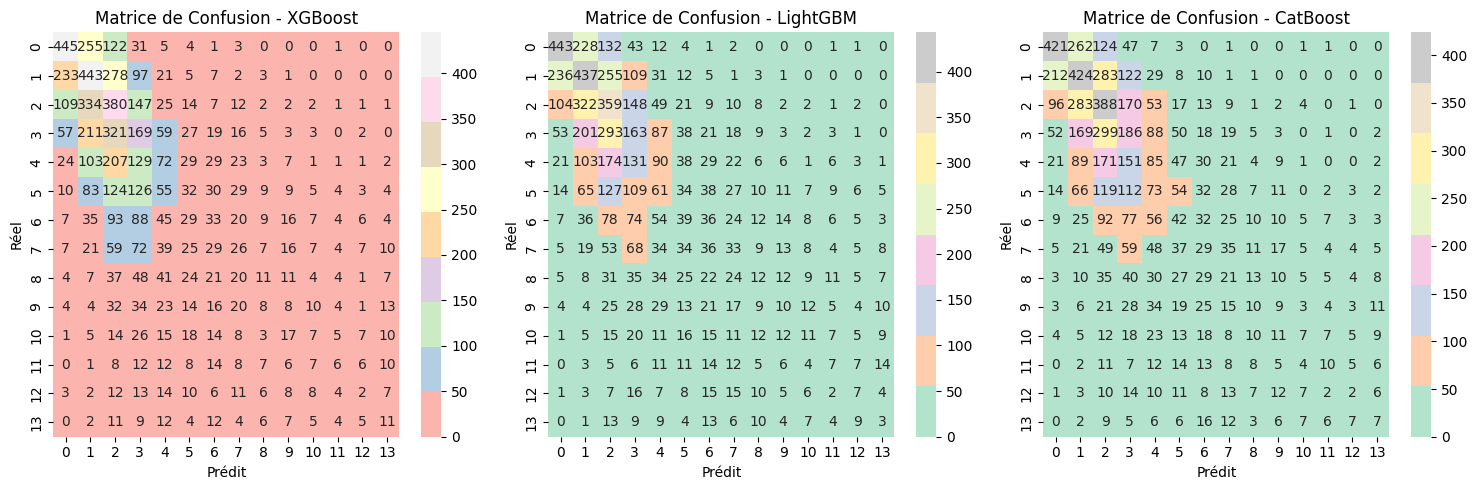

In [ ]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_best_xgb)
conf_matrix_lgb=confusion_matrix(y_test, y_pred_best_lgb)
conf_matrix_catboost = confusion_matrix(y_test, y_pred_best_catboost)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(conf_matrix_xgb, annot=True, fmt='g', ax=axs[0], cmap='Pastel1')
axs[0].set_title('Matrice de Confusion - XGBoost')
axs[0].set_xlabel('Prédit')
axs[0].set_ylabel('Réel')

sns.heatmap(conf_matrix_lgb, annot=True, fmt='g', ax=axs[1], cmap='Pastel2')
axs[1].set_title('Matrice de Confusion - LightGBM')
axs[1].set_xlabel('Prédit')
axs[1].set_ylabel('Réel')

sns.heatmap(conf_matrix_catboost, annot=True, fmt='g', ax=axs[2], cmap='Pastel2')
axs[2].set_title('Matrice de Confusion - CatBoost')
axs[2].set_xlabel('Prédit')
axs[2].set_ylabel('Réel')

plt.tight_layout()
plt.show()

In [ ]:
print("Classification report for the XGBoost model :")
print(classification_report(y_test, y_pred_best_xgb))
print("Classification report for the LightGBM model:")
print(classification_report(y_test, y_pred_best_lgb))
print("Classification report for the CatBoost model:")
print(classification_report(y_test, y_pred_best_catboost))



Classification report for the XGBoost model :
              precision    recall  f1-score   support

         0.0       0.49      0.51      0.50       867
         1.0       0.29      0.41      0.34      1090
         2.0       0.22      0.37      0.28      1037
         3.0       0.17      0.19      0.18       892
         4.0       0.16      0.11      0.13       631
         5.0       0.13      0.06      0.08       523
         6.0       0.14      0.08      0.10       396
         7.0       0.13      0.08      0.10       329
         8.0       0.14      0.05      0.07       240
         9.0       0.07      0.04      0.05       191
        10.0       0.11      0.05      0.06       150
        11.0       0.14      0.06      0.08       105
        12.0       0.05      0.02      0.03       106
        13.0       0.14      0.12      0.13        92

    accuracy                           0.25      6649
   macro avg       0.17      0.15      0.15      6649
weighted avg       0.22      0.25 

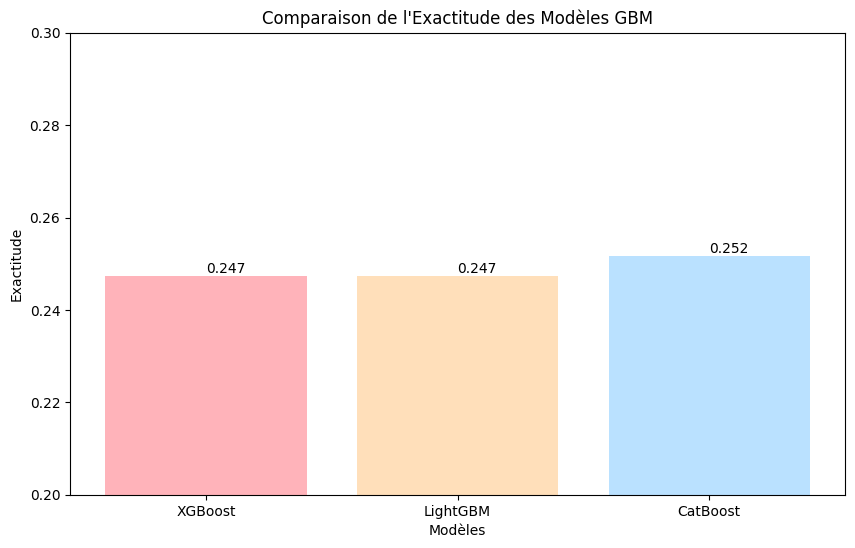

In [ ]:
results = {
    'XGBoost': accuracy_best_xgb,
    'LightGBM': accuracy_best_lgb,
    'CatBoost': accuracy_best_catboost
}

model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
bars =plt.bar(model_names, accuracies, color=['#ffb3ba', '#ffdfba','#bae1ff'])


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom')  # Afficher la valeur au-dessus de la barre

plt.ylim(0.2, 0.3)

plt.title('Comparaison de l\'Exactitude des Modèles GBM')
plt.xlabel('Modèles')
plt.ylabel('Exactitude')

plt.show()


<ipython-input-93-6d2a1f2f8067>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_scores = results_df.groupby(param_filter).mean()['mean_test_score']
<ipython-input-93-6d2a1f2f8067>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_scores = results_df.groupby(param_filter).std()['mean_test_score']
<ipython-input-93-6d2a1f2f8067>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_scores = results_df.groupby(pa

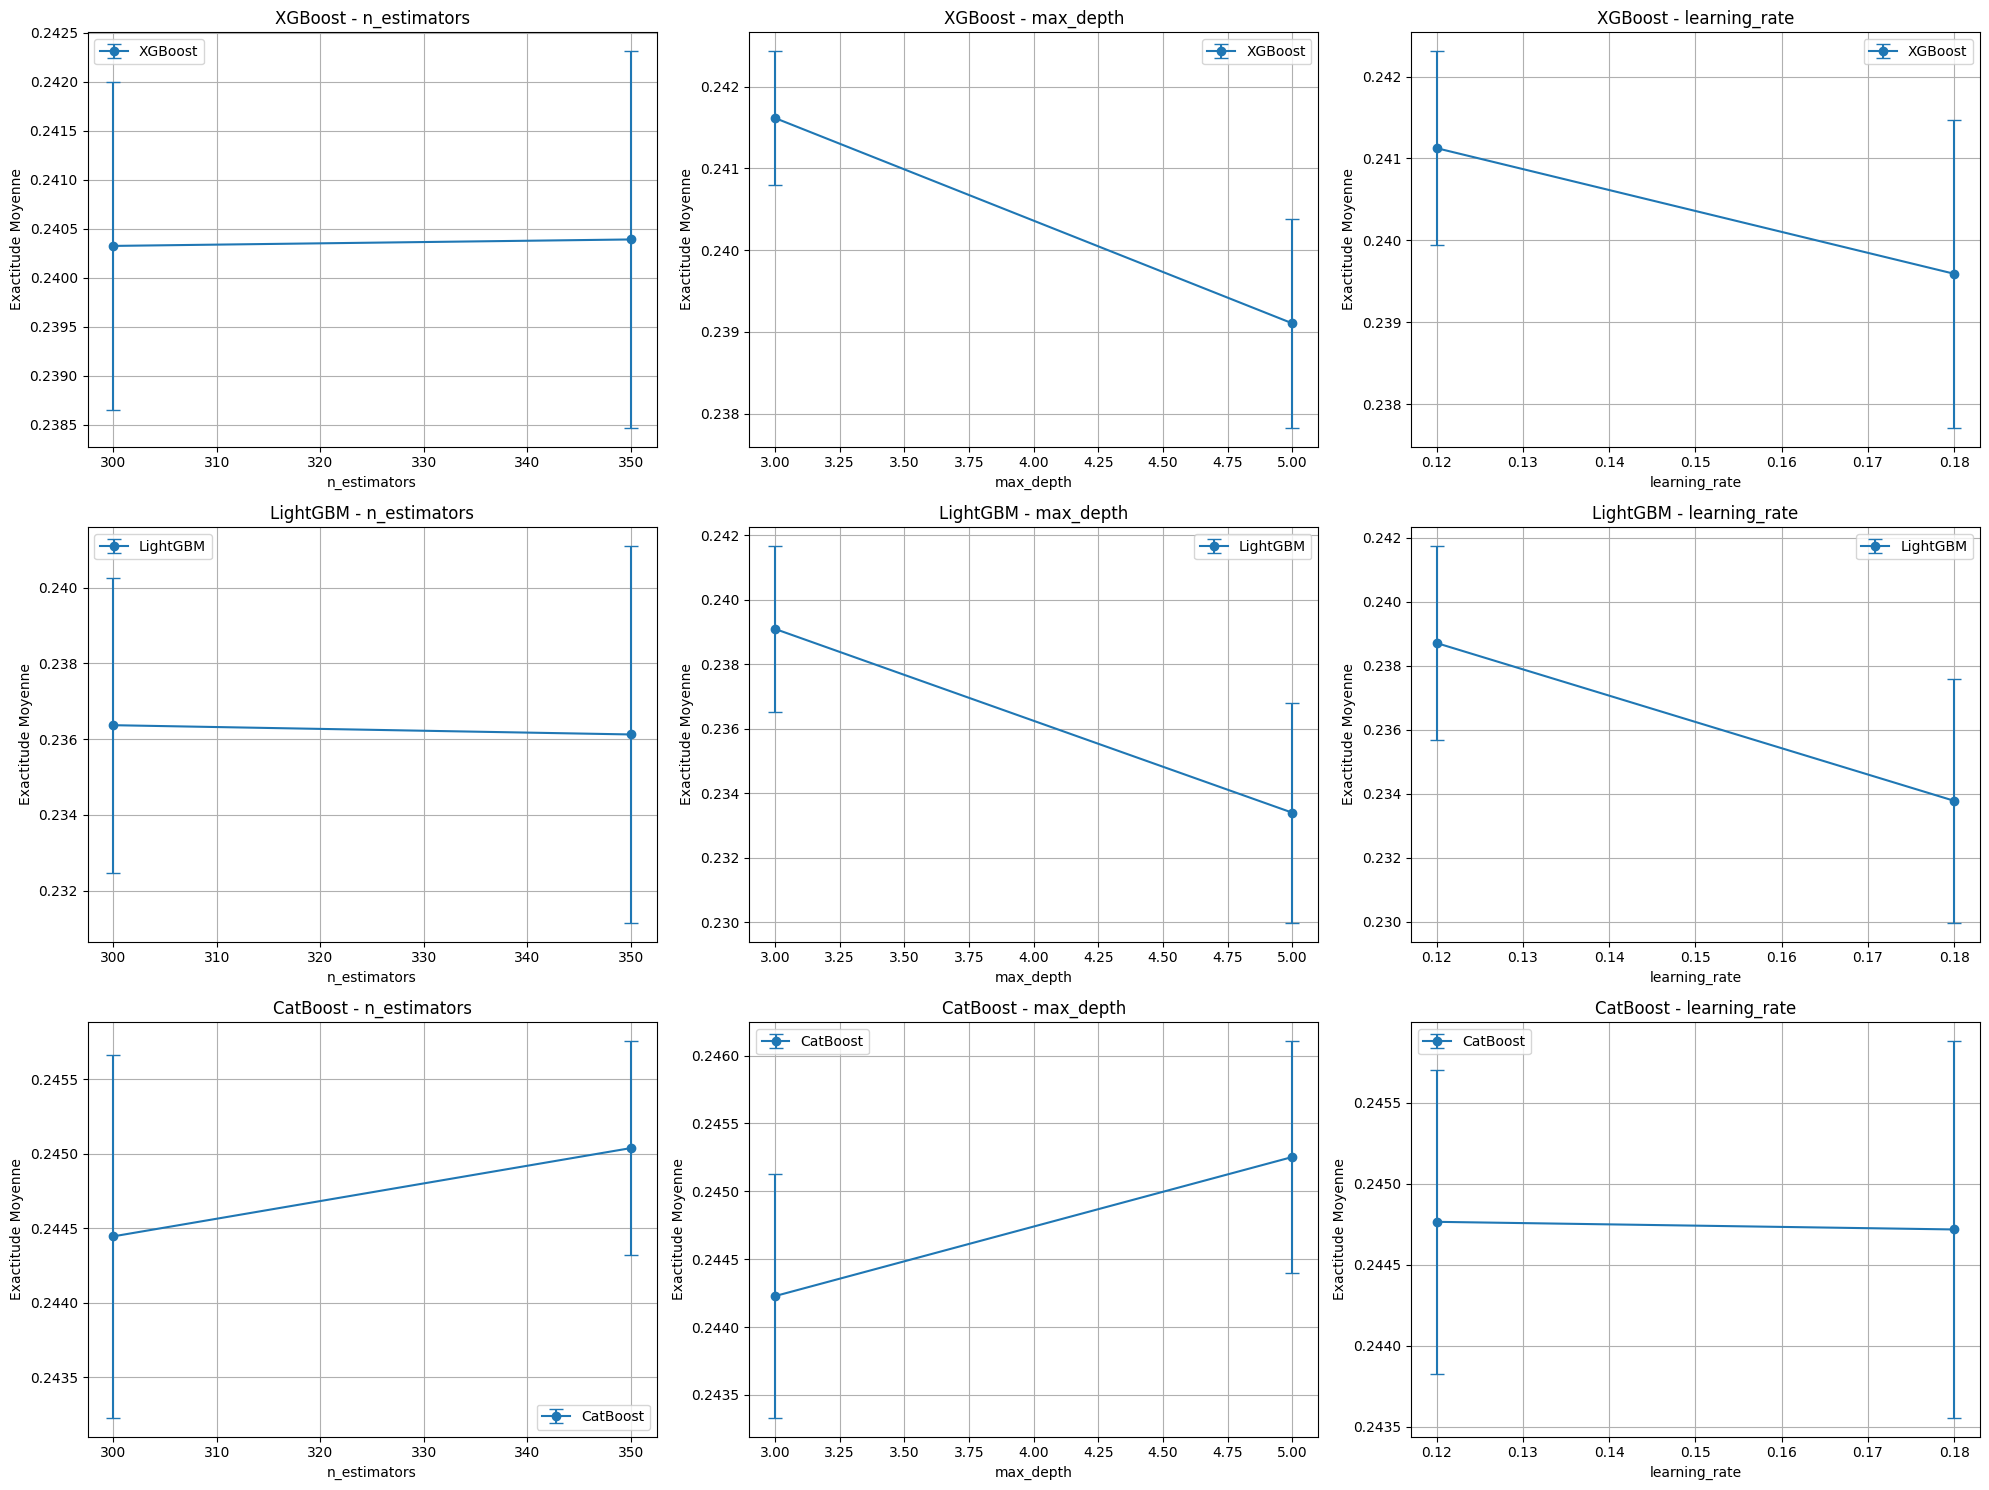

In [ ]:
def plot_model_performance(grid_search_cv, hyperparams, model_name, axs_row):
    results_df = pd.DataFrame(grid_search_cv.cv_results_)

    for idx, hyperparam in enumerate(hyperparams):
        ax = axs_row[idx]
        param_filter = f'param_{hyperparam}'
        mean_scores = results_df.groupby(param_filter).mean()['mean_test_score']
        std_scores = results_df.groupby(param_filter).std()['mean_test_score']

        mean_scores.plot(kind='line', yerr=std_scores, label=model_name, capsize=5, ax=ax, marker='o')
        ax.set_xlabel(hyperparam)
        ax.set_ylabel('Exactitude Moyenne')
        ax.set_title(f'{model_name} - {hyperparam}')
        ax.legend()
        ax.grid(True)

hyperparams_list = list(param_grid.keys())
fig, axs = plt.subplots(3, len(hyperparams_list), figsize=(20, 15))  # 3 lignes pour 3 modèles, colonnes pour hyperparamètres

plot_model_performance(grid_search_xgb, hyperparams_list, 'XGBoost', axs[0])
plot_model_performance(grid_search_lgb, hyperparams_list, 'LightGBM', axs[1])
plot_model_performance(grid_search_catboost, hyperparams_list, 'CatBoost', axs[2])

plt.tight_layout()
plt.show()
